In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import pandas_ml as pdml
import imblearn

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
X = df.iloc[:,:-1]
y = df['Class']

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 492 fraud data points and 284315 regular data points.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
print("Size of training set: ", X_train.shape)

Size of training set:  (190820, 30)


# Simplest Neural Network (for testing)

In [9]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train.as_matrix(), y_train, epochs=1)

Epoch 1/1
190820/190820 [==============================] - 6s 32us/step - loss: 0.1962 - acc: 0.9877


In [11]:
print("Loss: ", model.evaluate(X_test.as_matrix(), y_test, verbose=0))

Loss:  [0.026581808290838557, 0.9983508357538808]


In [12]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          93832  0    93832
1            155  0      155
__all__    93987  0    93987


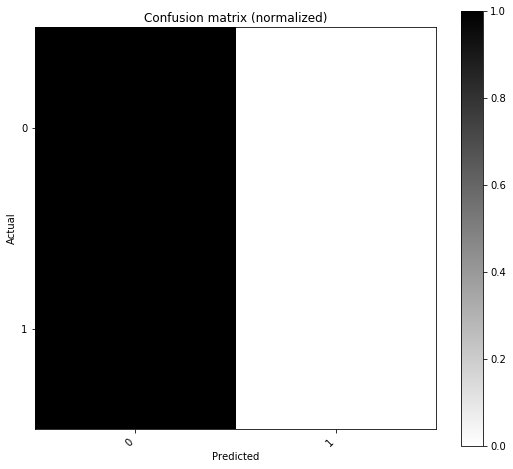

In [13]:
from pandas_ml import ConfusionMatrix
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()

In [14]:
confusion_matrix.print_stats()

/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: RuntimeWarning: overflow encountered in long_scalars
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:61: RuntimeWarning: overflow encountered in long_scalars
  den = (np.float64(nis2 + njs2) / 2 - np.float64(nis2 * njs2) / n2)
/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self.FN)))
/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:339: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FNR) / sel

Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          93832  0    93832
1            155  0      155
__all__    93987  0    93987


Overall Statistics:

Accuracy: 0.9983508357538808
95% CI: (0.998070079812819, 0.9986000737768896)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1
Population                                  93987       93987
P: Condition positive                       93832         155
N: Condition negative                         155       93832
Test outcome positive                       93987           0
Test outcome negative                           0       93987
TP: True Positive                           93832           0
TN: True Negative                               0       93832
FP: False Positive                            155           0
FN: False Negative                              0         155
TPR:

/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


# Oversampling with gaussian noise (commented out)

In [30]:
# noise = np.random.normal(0,.1,30)

# # 0 is the mean of the normal distribution you are choosing from
# # 1 is the standard deviation of the normal distribution
# # 100 is the number of elements you get in array noise
# noise

In [31]:
# frauds.head()

In [32]:
# for i in range(300):
#     #frauds.iloc[i] += noise[i]
#     frauds.append(frauds.iloc[i % 30] + noise[i % 30])

In [33]:
# NEED TO ADD A (DIFFERENT BUT SIMILAR) RANDOM NOISE ARRAY TO EVERY ROW OF FRAUDS TABLE (WITHOUT CLASS)
# THEN ADD THIS TO ORIGINAL FRAUDS TABLE (MAKING MORE DATA POINTS)
# AND RE SPLIT DATA AND DO NEURAL NET
# ALSO TRY FORCING 50% OF FRAUDS INTO TRAINING SET AND 50% INTO TEST SET

# Neural Network after Oversampling, Scaling, and PCA (10 components)

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['Class']

data = scale(X2)
pca = PCA(n_components=10)
X2 = pca.fit_transform(data)
X2

array([[ -2.41344096,  -0.05077442,   0.4388987 , ...,   0.30189531,
          1.13203754,   0.27948299],
       [ -2.37812924,   0.49443343,   0.90793601, ...,   0.69965588,
          1.18870827,   1.49530544],
       [ -2.42445556,  -0.33377306,   0.19772039, ...,   0.36496678,
         -0.91012905,   0.59274544],
       ...,
       [ -1.79753516,   0.2320927 ,   0.10883849, ...,   0.01133063,
         -0.54005318,  -0.10402347],
       [ 10.58873744, -10.87564385,  -1.84028381, ...,  -1.65367683,
          0.85955189,   0.08983926],
       [ -2.07597959,  -0.62911527,  -0.14648643, ...,   1.2531439 ,
         -0.44473994,  -0.0340934 ]])

In [16]:
model2 = Sequential()
model2.add(Dense(10, input_dim=10, activation='relu')) 
model2.add(Dense(27, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 27)                297       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                560       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________


In [17]:
X2_test = pca.fit_transform(X_test)
h = model2.fit(X2, y2, epochs=5, validation_data=(X2_test, y_test))

Train on 380966 samples, validate on 93987 samples
Epoch 1/5
380966/380966 [==============================] - 19s 51us/step - loss: 0.0169 - acc: 0.9946 - val_loss: 8.4534 - val_acc: 0.4698
Epoch 2/5
380966/380966 [==============================] - 17s 45us/step - loss: 0.0059 - acc: 0.9983 - val_loss: 8.4539 - val_acc: 0.4697
Epoch 3/5
380966/380966 [==============================] - 17s 44us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 8.4539 - val_acc: 0.4697
Epoch 4/5
380966/380966 [==============================] - 17s 46us/step - loss: 0.0042 - acc: 0.9989 - val_loss: 8.4534 - val_acc: 0.4698
Epoch 5/5
380966/380966 [==============================] - 19s 50us/step - loss: 0.0038 - acc: 0.9990 - val_loss: 8.4541 - val_acc: 0.4697


In [18]:
print("Loss: ", model2.evaluate(X2_test, y_test, verbose=2))

Loss:  [8.454091954272103, 0.46971389660303875]


In [19]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y_test)

Confusion matrix:
Predicted  False   True  __all__
Actual                          
False      44040  49792    93832
True          48    107      155
__all__    44088  49899    93987


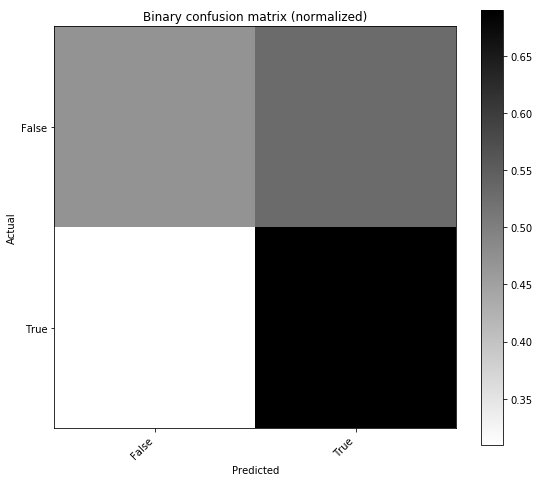

population: 93987
P: 155
N: 93832
PositiveTest: 49899
NegativeTest: 44088
TP: 107
TN: 44040
FP: 49792
FN: 48
TPR: 0.6903225806451613
TNR: 0.46934947565862395
PPV: 0.0021443315497304554
NPV: 0.9989112683723462
FPR: 0.530650524341376
FDR: 0.9978556684502695
FNR: 0.3096774193548387
ACC: 0.46971389660272167
F1_score: 0.004275382586806249
MCC: 0.012982673460890005
informedness: 0.15967205630378523
markedness: 0.001055599922076711
prevalence: 0.0016491642461191442
LRP: 1.3008987063603947
LRN: 0.6598013536081568
DOR: 1.9716520726221078
FOR: 0.0010887316276537834


In [20]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()